# Statistical Learning with Python

In [133]:
import pandas as pd
import seaborn as sns

sns.set_theme(style="darkgrid")

In [9]:
df = pd.read_csv("Advertising.csv")
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [13]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


<Axes: xlabel='sales', ylabel='TV'>

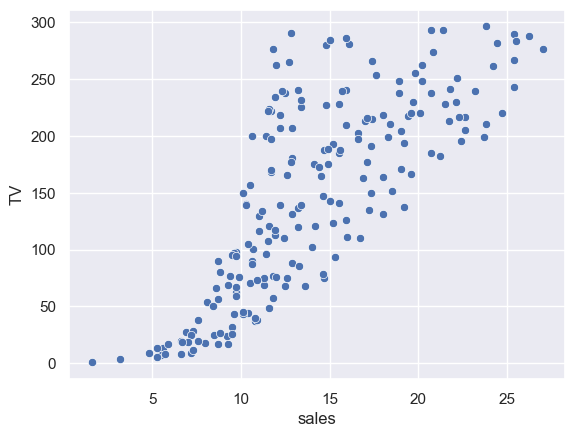

In [23]:
sns.scatterplot(data = df,
                x = "sales",
                y = "TV"
               )

<Axes: title={'center': 'Sales vs TV advertisement'}, xlabel='TV', ylabel='sales'>

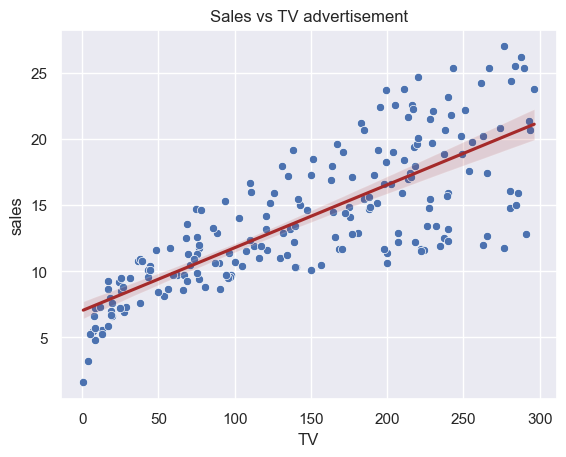

In [77]:
sns.scatterplot(data=df, x="TV", y="sales").set(title="Sales vs TV advertisement")
sns.regplot(data=df, x="TV", y="sales", scatter=False, color="brown")

<Axes: title={'center': 'Sales vs Radio advertisement'}, xlabel='radio', ylabel='sales'>

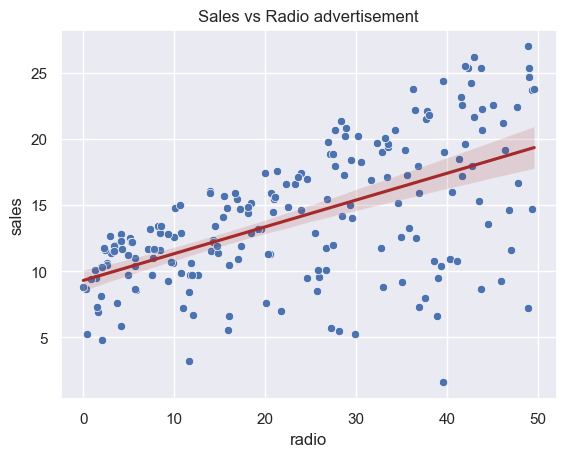

In [79]:
sns.scatterplot(data=df, x="radio", y="sales").set(title="Sales vs Radio advertisement")
sns.regplot(data=df, x="radio", y="sales", scatter=False, color="brown")

<Axes: title={'center': 'Sales vs Newspaper advertisement'}, xlabel='newspaper', ylabel='sales'>

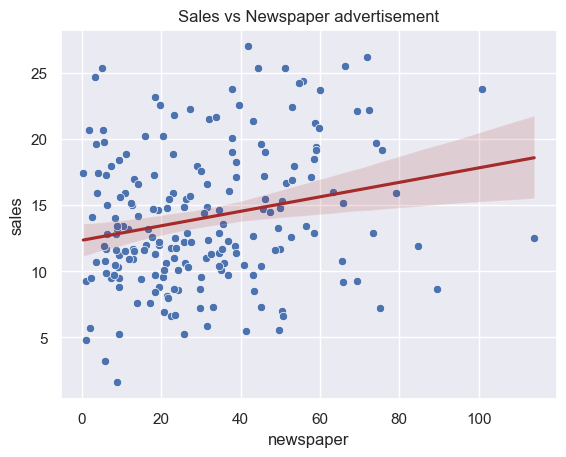

In [81]:
sns.scatterplot(data=df, x="newspaper", y="sales").set(title="Sales vs Newspaper advertisement")
sns.regplot(data=df, x="newspaper", y="sales", scatter=False, color="brown")

<Axes: >

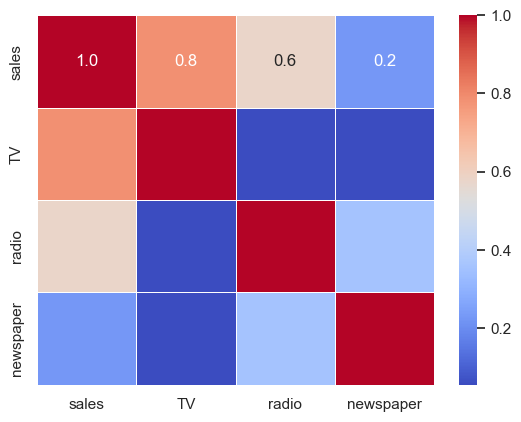

In [109]:
sns.heatmap(df[["sales","TV", "radio", "newspaper"]].corr(), 
            annot=True, 
            fmt="0.1f",
            linewidth=0.5,
            cmap="coolwarm"
           )

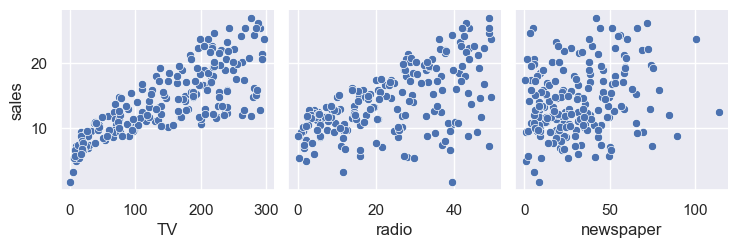

In [121]:
sns.pairplot(df, x_vars=["TV", "radio", "newspaper"], y_vars="sales")

## Run Linear Regression (OLS regression)

In [135]:
# run OLS regression (Linear regression)
import statsmodels.api as sm

x = df[["TV", "radio", "newspaper"]] #independent variables
y = df["sales"] # dependent variable

x = sm.add_constant(x) # add constant (intercept)

result = sm.OLS(y, x).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Thu, 15 May 2025   Prob (F-statistic):           1.58e-96
Time:                        01:44:45   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0

### Interpretation of OLS Regression summary
-  R-squared = 0.897 -> 89.7% of the variation in sales is explained by the 3 advertising channels combined
-  F-statistic = 570.3, p-value=1.58e-96 -> extremely small value means the model is highly statistically significant
-  const = 2.9389 -> when all ad spends are zero, the sales are predicted to be 2.94 units (Highly significant as p<0.001)
-  TV = 0.0458 -> a 1 unit increase in TV ad spend increases sales by 0.0458 units (Highly significant as p<0.001)
-  radio = 0.1885 -> a 1 unit increase in radio ad spend increases sales by 0.1885 units (Highly significant as p<0.001)
-  newspaper = -0.0010 -> has a very small negative effect, not significant as p=0.860
-  Conclusion -> TV and radio ad spending are both strong and significant predictors of sales, while newspaper ad appears to have no meaningful effect on sales

In [137]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [149]:
df_melt = pd.melt(df, id_vars = ["sales"], value_vars=["TV", "radio", "newspaper"])
df_melt.head()

,sales,variable,value
0,22.1,TV,230.1
1,10.4,TV,44.5
2,9.3,TV,17.2
3,18.5,TV,151.5
4,12.9,TV,180.8


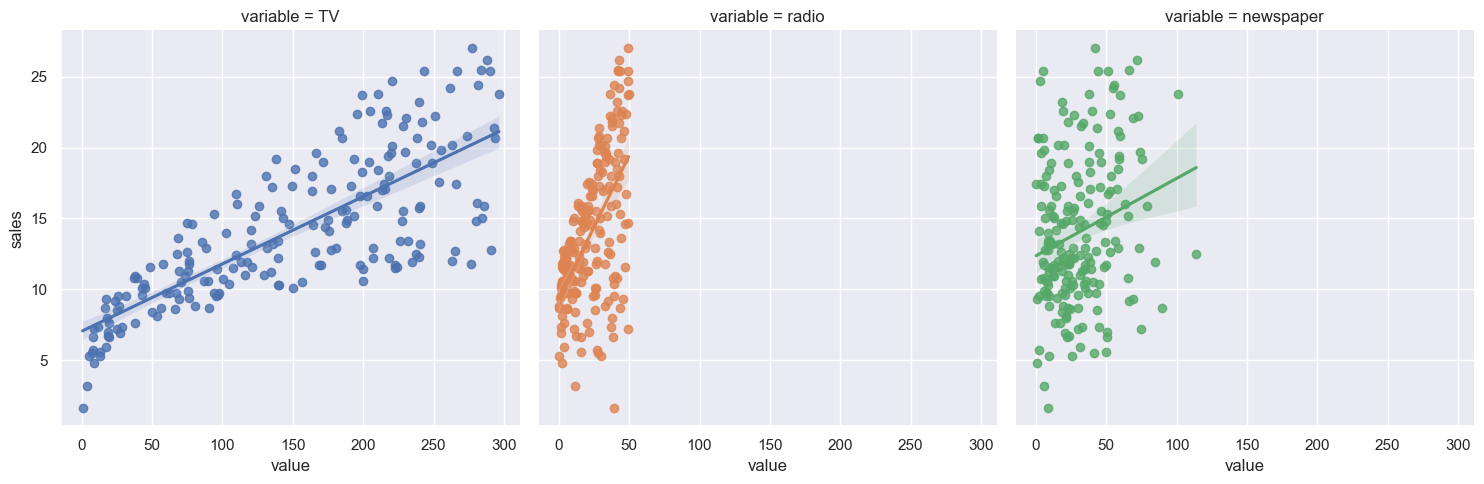

In [160]:
sns.lmplot(data=df_melt, x="value", y="sales", hue="variable", col="variable")

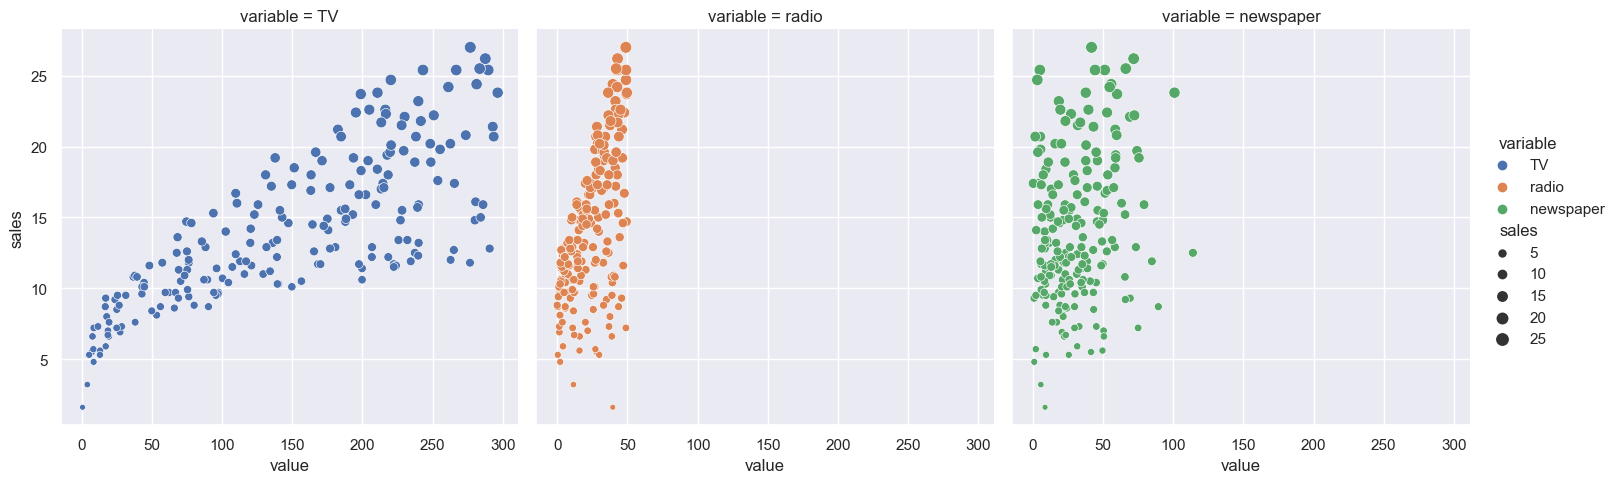

In [164]:
sns.relplot(
    data=df_melt,
    x="value",
    y="sales",
    col="variable",
    hue="variable",
    size="sales"
)